# Add features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ta.momentum import *
from ta.trend import *
from ta.volume import *
from ta.volatility import *

import sys
sys.path.insert(0, '..')
import useful_functions as uf

In [8]:
df = pd.read_csv("../data/BTCUSDT-minute-target-ui.csv") #atr tpsl

In [9]:
# RSI
def variations(windows:list[int]):
    """
    returns variations of rsi indicator with given windows
    """
    name = "rsi_"
    for w in windows:

        i = RSIIndicator(df.close, w)
        df[name + str(w)] = i.rsi()
        df[name + "rate_" + str(w)] = uf.get_rate(uf.get_moving_average(df[name + str(w)], w))
variations([10, 100, 1000])

# ARN Aroonindicator
def variations(windows:list[int]):
    """
    returns variations of arn indicator with given windows
    """
    name = "arn_"
    for w in windows:
        i = AroonIndicator(df.close, window=w)
        df[name + "down_" + str(w)] = i.aroon_down()
        df[name + str(w)] = i.aroon_indicator()
        df[name + "up_" + str(w)] = i.aroon_up()
        df[name + "rate_" + str(w)] = uf.get_rate(uf.get_moving_average(df[name + str(w)], w))
        df[name + "down_rate_" + str(w)] = uf.get_rate(uf.get_moving_average(df[name + "down_" + str(w)], w))
        df[name + "up_rate_" + str(w)] = uf.get_rate(uf.get_moving_average(df[name + "up_" + str(w)], w))
variations([10, 100, 1000])

# BB Bollinger bands
def variations(windows:list[int]):
    """
    returns variations of atr indicator with given windows
    """
    name = "bb_"
    for w in windows:
        bb = BollingerBands(df["close"], window=w, window_dev=2)
        df[name + "pband_" + str(w)] = bb.bollinger_pband()
        df[name + "wband_" + str(w)] = bb.bollinger_wband() #width band, try width/close
        df[name + "pband_rate_" + str(w)] = uf.get_rate(uf.get_moving_average(df[name + "pband_" + str(w)], w))
        df[name + "wband_rate_" + str(w)] = uf.get_rate(uf.get_moving_average(df[name + "wband_" + str(w)], w))
        
variations([10, 100, 1000])

# Force Indicator FI
def variations(windows:list[int]):
    """
    returns variations of atr indicator with given windows
    """
    name = "fi_"
    for w in windows:
        i = ForceIndexIndicator(df.close, df.volume, window=w)
        df[name + str(w)] = list(map(lambda x: uf.log_abs(x*10), i.force_index()))
        df[name + "rate_" + str(w)] = uf.get_rate(uf.get_moving_average(df[name + str(w)], w))
variations([10, 100, 1000])

# PPO Percentage Price Oscillator
def variations(windows:list[int]):
    """
    returns variations of rsi indicator with given windows
    """
    name = "ppo_"
    for s in windows:
        f = s*2
        sl = int(float(f)*2.5)
        i = PercentagePriceOscillator(df.close, sl, f, s)
        sma_name = name + str(s)
        df[name + str(s)] = i.ppo()
        df[name + "hist_" + str(s)] = i.ppo_hist()
        df[name + "signal_" + str(s)] = i.ppo_signal()
        df[name + "rate_" + str(s)] = uf.get_rate(uf.get_moving_average(df[name + str(s)], s))
        df[name + "hist_rate_" + str(s)] = uf.get_rate(uf.get_moving_average(df[name + "hist_" + str(s)], s))
        df[name + "sig_rate_" + str(s)] = uf.get_rate(uf.get_moving_average(df[name + "signal_" + str(s)], s))

variations([20, 100, 1000])

# TRIX
def variations(windows:list[int]):
    """
    returns variations of atr indicator with given windows
    """
    name = "trix_"
    for w in windows:
        i = TRIXIndicator(df.close, window=w)
        df[name + str(w)] = i.trix()
        df[name + "rate_" + str(w)] = uf.get_rate(uf.get_moving_average(df[name + str(w)], w))
variations([10, 100, 1000])

In [10]:
df.to_csv("../data/BTCUSDT-minute-target-dip-features.csv", index=False) #Minute

## Plotting and correlations

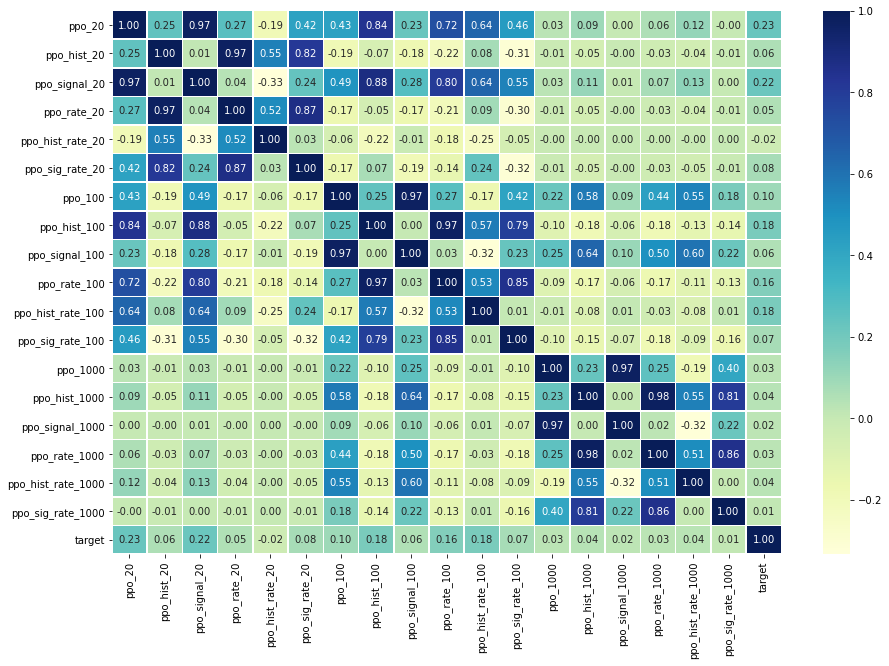

In [7]:
indicators = list(df.columns)[14:]
indicators = list(filter(lambda x: x[:3] == "ppo", indicators))
indicators.append("target")



d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

In [58]:
d = df[-10000:]

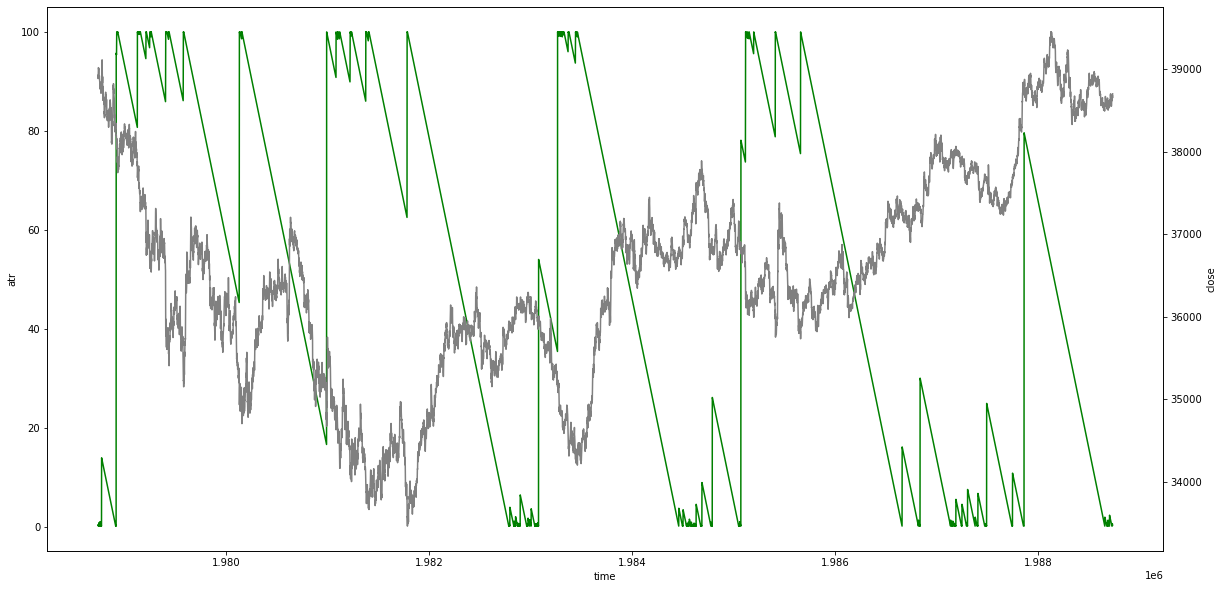

In [60]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(d.arn_down_1000,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(d.close,
         color="gray")

# ax3=ax.twinx()
# ax3.plot(d.target,
#          color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()